# Project 

In [5]:
import numpy as np
import random
from scipy.special import gamma, factorial
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import tqdm
from numba import jit
from numba import njit, prange
import time
from scipy.integrate import solve_ivp
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

In [6]:
def IsInputBetweenXandY(inp,x,y):
    if inp > x and inp < y:
        return True
    else:
        return False

# Uniform Initial Distribution

In [ ]:
N=5000 #Number of Agents
endtime=100 #Time to end simulation
velocity=[0]*N #Creating list of Velocities for each agent
position=[0]*N #Creating list of positions for each agent
changing=[0]*N #Time until the agent changes direction
T=0 #Length of Simulation
t=[] #This will track the time for each step
count=0 #This is the number of loops in the code
avgposition=[] #This will track the average position for each step
MaxVelocity=1 #This is the largest Magnitude of velocity any agent can have
L=5 #Length of subintervals
Domain=100 #The region will be [-100,100]
lam_0=.5 #Scaling in Gamma Distribution
mu=.45 #Bias of Gamma Distribution towards higher concentration
k=10 #Shape in Gamma Distribution
avgdistance=k/lam

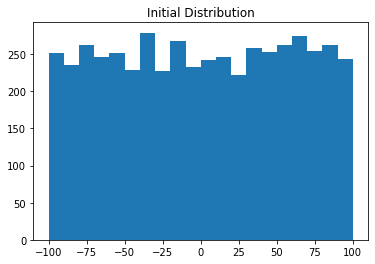

t= 12.587393643435144


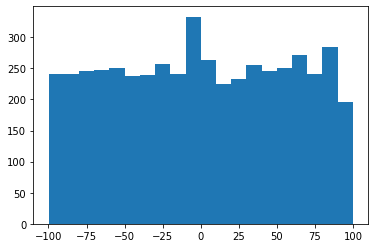

t= 16.57892121602941


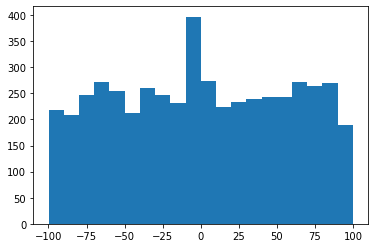

t= 20.31766061484975


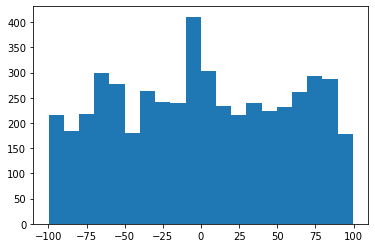

t= 24.237901427184596


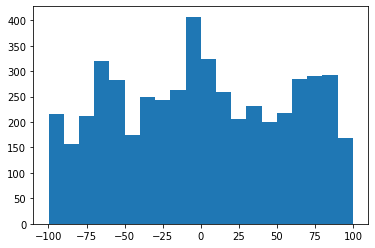

t= 28.50761410907684


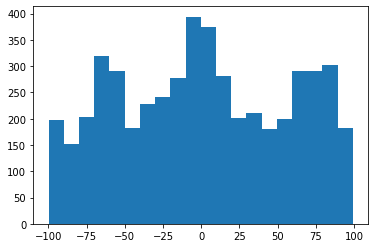

t= 33.1162351247885


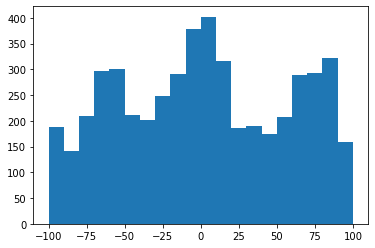

t= 37.43672338322684


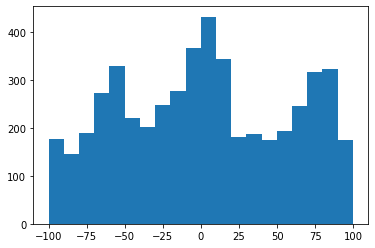

t= 41.953837031741


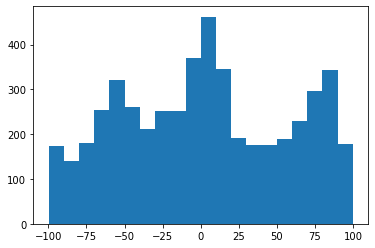

t= 46.808406591384355


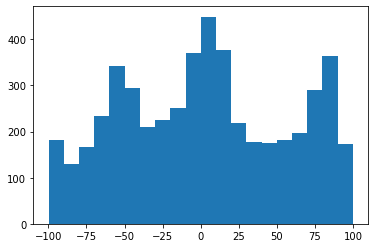

t= 52.012484917865166


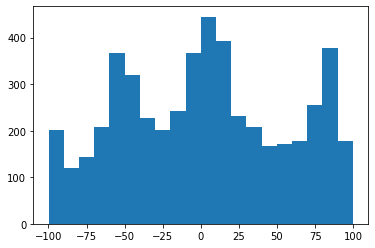

t= 56.98377292674076


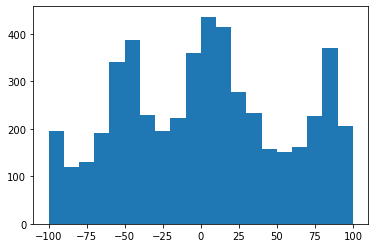

t= 62.52333592500216


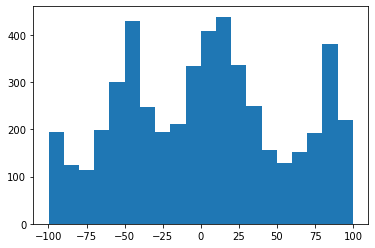

t= 68.1374621417507


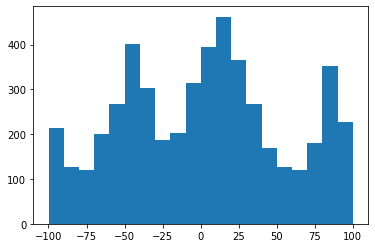

t= 74.21371350000271


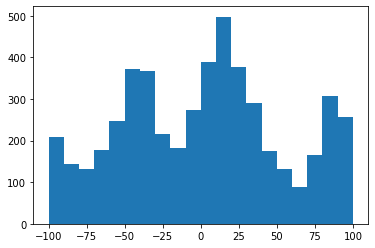

t= 80.28493492349368


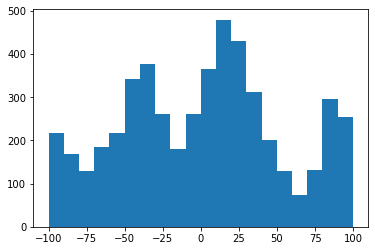

t= 87.06002736404251


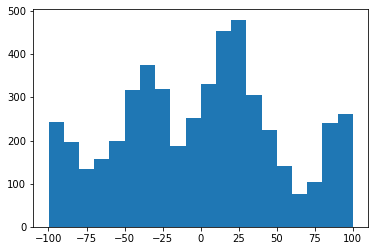

t= 93.79439804397569


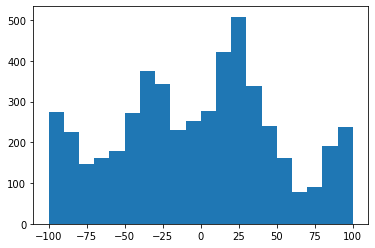

Text(0.5, 1.0, 'Final Graph')

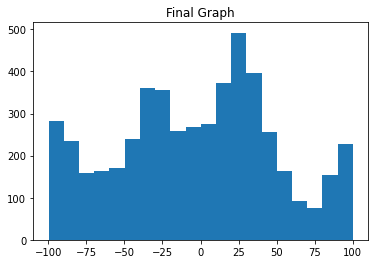

In [47]:
N=5000 #Number of Agents
endtime=100 #Time to end simulation
velocity=[0]*N #Creating list of Velocities for each agent
position=[0]*N #Creating list of positions for each agent
changing=[0]*N #Time until the agent changes direction
T=0 #Length of Simulation
t=[] #This will track the time for each step
count=0 #This is the number of loops in the code
avgposition=[] #This will track the average position for each step
MaxVelocity=1 #This is the largest Magnitude of velocity any agent can have
L=5 #Length of subintervals
Domain=100 #The region will be [-100,100]
lam_0=.5 #Scaling in Gamma Distribution
mu=.45 #Bias of Gamma Distribution towards higher concentration
k=10 #Shape in Gamma Distribution
avgdistance=k/lam_0; #Average distance traveled before changing directions
for i in range(N):#This loop gives each agent their initial velocity and position
    rnd1=random.random()
    if rnd1<.5: #This will give each agent a random velocity with magnitude <= MaxVelocity
        velocity[i]=(2*MaxVelocity)*rnd1
    else:
        velocity[i]=(2*MaxVelocity)*rnd1-2*MaxVelocity
    rnd2=random.random()
    if rnd2<.5: #This will give each agent a random velocity with magnitude <= MaxVelocity
        position[i]=(2*Domain)*rnd2
    else:
        position[i]=(2*Domain)*rnd2-2*Domain
    
for j in range(N): #This loops will calculate the time in which each agent moves with their current velocity
    right=[]
    left=[]
    xr=position[j]
    yr=position[j]+avgdistance
    xl=position[j]-avgdistance
    yl=position[j]
    if Domain-position[j]<avgdistance: #Accounts for avgdistance exceeding boundaries to right
        yrshift=-Domain+(avgdistance-Domain+position[j])
        right=list(filter(lambda inp: inp>xr and inp < yr, position))
        left=list(filter(lambda inp: inp>xl and inp < yl, position))
        right=np.append(right,filter(lambda inp: inp>-Domain and inp < yrshift, position))
    elif abs(-Domain-position[j])<avgdistance:#Accounts for avgdistance exceeding boundaries to left
        xlshift=Domain-(avgdistance-Domain-position[j])
        right=list(filter(lambda inp: inp>xr and inp < yr, position))
        left=list(filter(lambda inp: inp>xl and inp < yl, position))
        left=np.append(left,list(filter(lambda inp: inp>xlshift and inp < Domain, position)))
    else: 
        right=list(filter(lambda inp: inp>xr and inp < yr, position))
        left=list(filter(lambda inp: inp>xl and inp < yl, position))
    if velocity[j]>0:
        S=(len(right)-len(left))/avgdistance
    else:
        S=(len(left)-len(right))/avgdistance
    lam=lam_0-2*mu/np.pi*np.arctan(S*velocity[j])
    changing[j]=np.random.gamma(k,1/lam)
plt.hist(position, bins=20,range=[-Domain, Domain])
plt.title('Initial Distribution')
plt.xlabel('Position')
plt.ylabel('Number of Agents')
plt.show()
while T <endtime: 
    dT=min(changing)
    T=T+dT
    t=np.append(t,T)
    changing=np.array(changing)
    position=np.array(position)
    velocity=np.array(velocity)
    changing=changing-dT
    position=position+velocity*dT
    for q in range(N):
        if abs(position[q])>Domain:
            if position[q]<0:
                position[q]=position[q] % Domain
            if position[q]>0:
                position[q]=-(-position[q]%Domain)
    for p in range(N):
        if changing[p] <=0:
            velocity[p]=(-1)*np.sign(velocity[p])*random.random()
            right=[]
            left=[]
            xr=position[p]
            yr=position[p]+avgdistance
            xl=position[p]-avgdistance
            yl=position[p]
            if Domain-position[p]<avgdistance: #Accounts for avgdistance exceeding boundaries to right
                yrshift=-Domain+(avgdistance-Domain+position[p])
                right=list(filter(lambda inp: inp>xr and inp < yr, position))
                left=list(filter(lambda inp: inp>xl and inp < yl, position))
                right=np.append(right,filter(lambda inp: inp>-Domain and inp < yrshift, position))
            elif abs(-Domain-position[p])<avgdistance:#Accounts for avgdistance exceeding boundaries to left
                xlshift=Domain-(avgdistance-Domain-position[p])
                right=list(filter(lambda inp: inp>xr and inp < yr, position))
                left=list(filter(lambda inp: inp>xl and inp < yl, position))
                left=np.append(left,list(filter(lambda inp: inp>xlshift and inp < Domain, position)))
            else: 
                right=list(filter(lambda inp: inp>xr and inp < yr, position))
                left=list(filter(lambda inp: inp>xl and inp < yl, position))
            if velocity[p]>0:
                S=(len(right)-len(left))/avgdistance
            else:
                S=(len(left)-len(right))/avgdistance
            lam=lam_0-2*mu/np.pi*np.arctan(S*velocity[p])
            changing[p]=np.random.gamma(k,1/lam)
    if len(t)%1000==0:
        print('t=', t[-1])
        plt.hist(position, bins=20,range=[-Domain, Domain])
        plt.xlabel('Position')
        plt.ylabel('Number of Agents')
        plt.show()
plt.hist(position, bins=20,range=[-Domain, Domain])
plt.title('Final Graph')
plt.xlabel('Position')
plt.ylabel('Number of Agents')


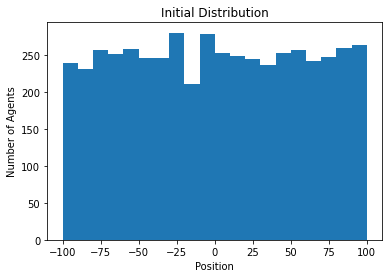

t= 4.716839970534213


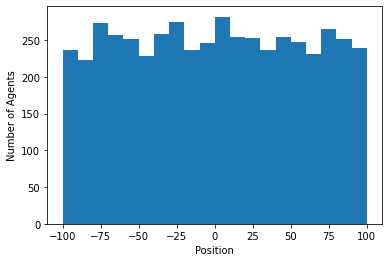

t= 10.037168289035078


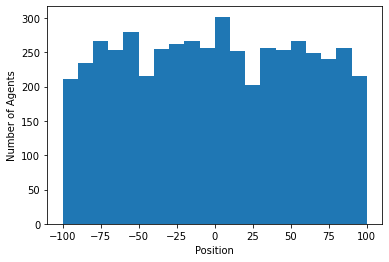

t= 15.922958764157775


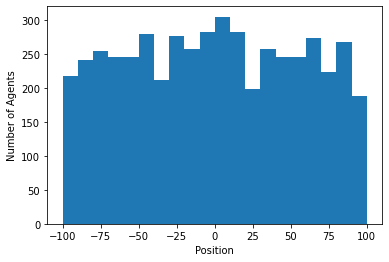

t= 21.409562268690504


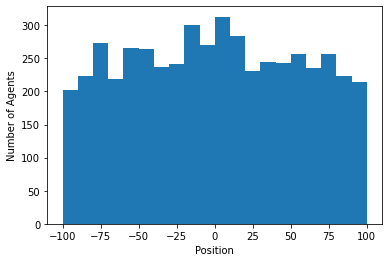

t= 26.860766195261082


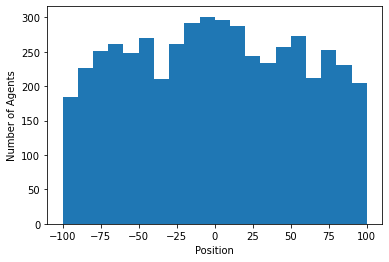

t= 32.0265213054594


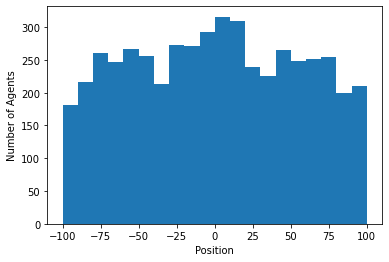

t= 37.40531521521619


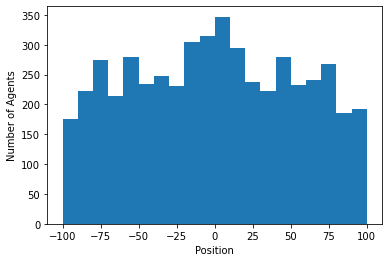

t= 42.767095946669116


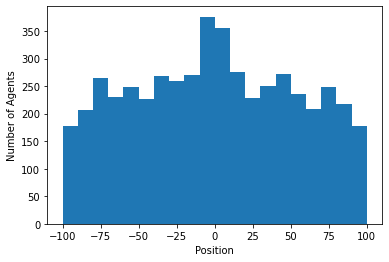

t= 48.2977334510313


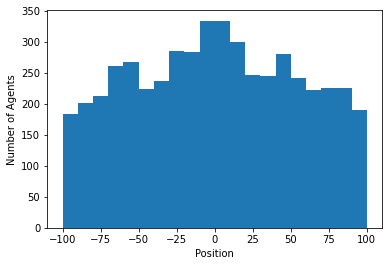

t= 53.88429759704323


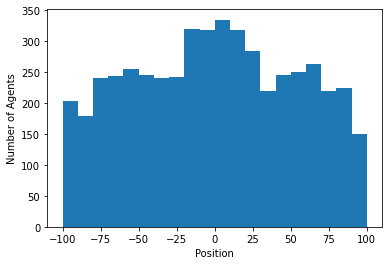

t= 59.50686697283615


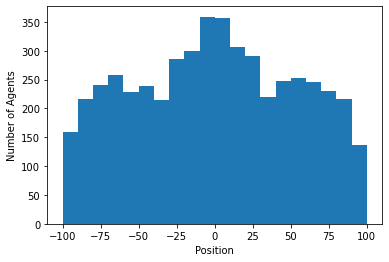

t= 64.93289327513146


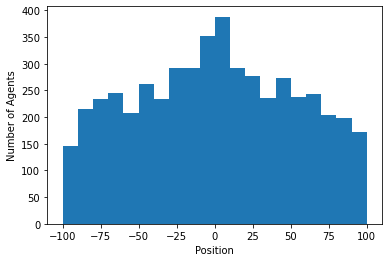

t= 70.52455976656633


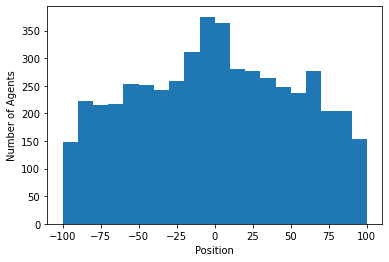

t= 76.12818923981472


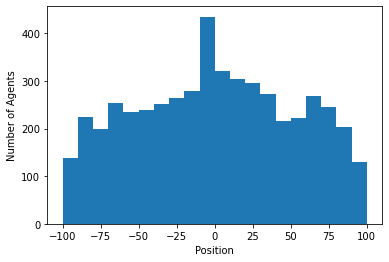

t= 81.57905112275708


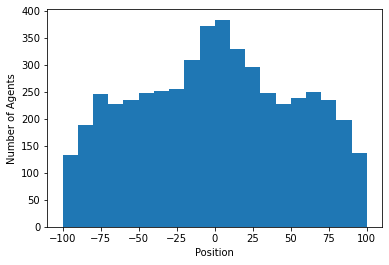

t= 87.07402647366368


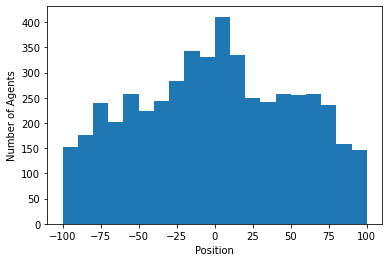

t= 92.73165332852743


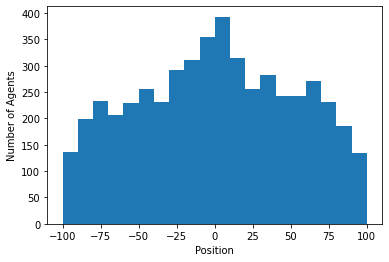

t= 98.6980787066606


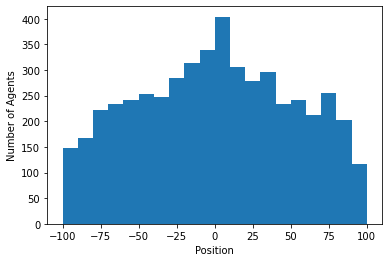

t= 104.28004224009126


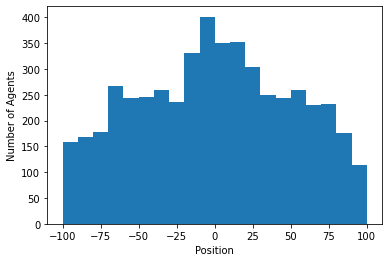

t= 109.74257900802729


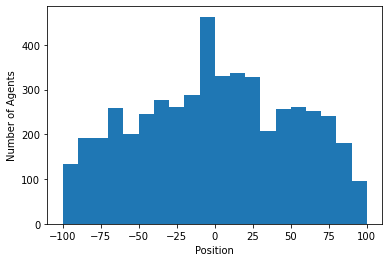

t= 115.34327409533542


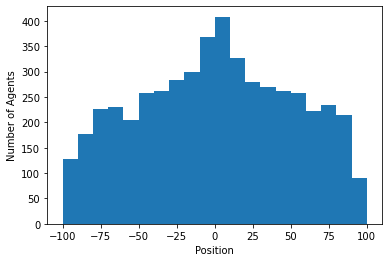

t= 121.07691759456738


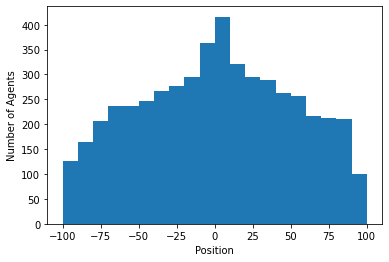

t= 126.63959757067087


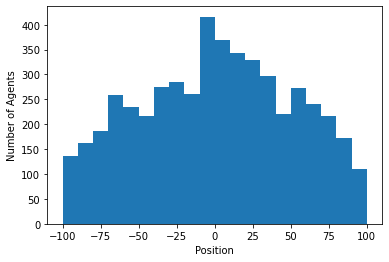

t= 132.16689163033863


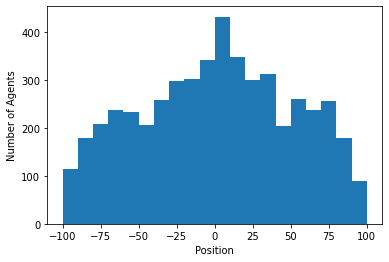

t= 137.7253309598195


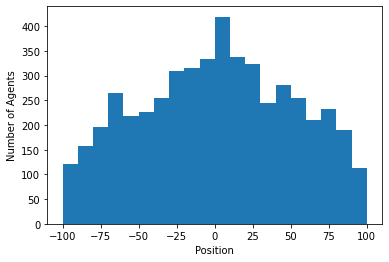

t= 143.22430030690882


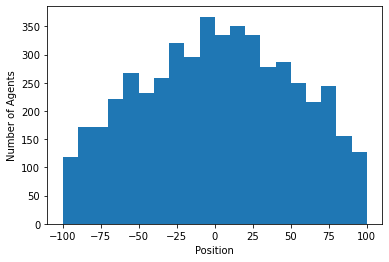

t= 148.75029714382933


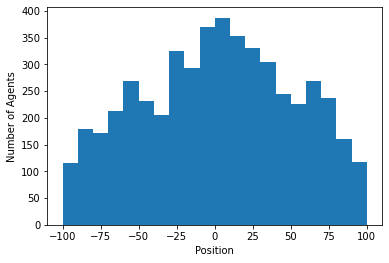

t= 153.96863964650592


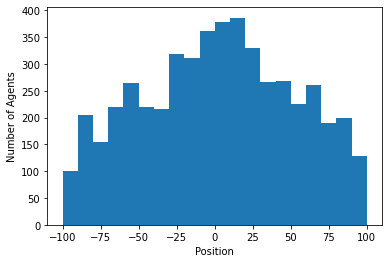

t= 159.4219304808934


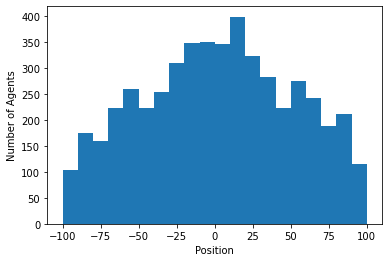

t= 165.05730190275224


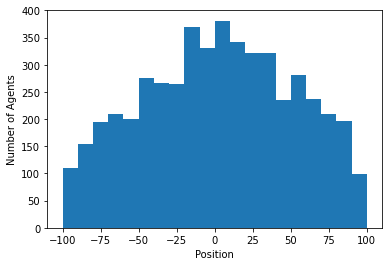

t= 170.83154366611544


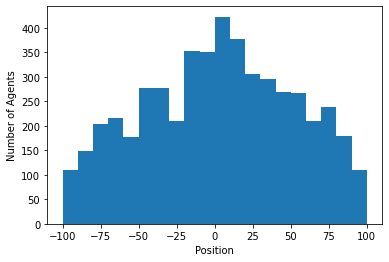

t= 176.56692633725848


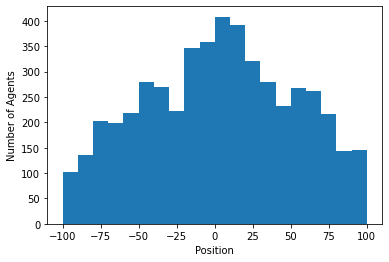

t= 182.1666202384904


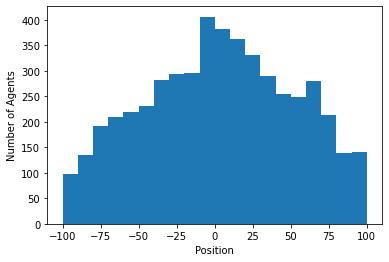

t= 187.78249206550774


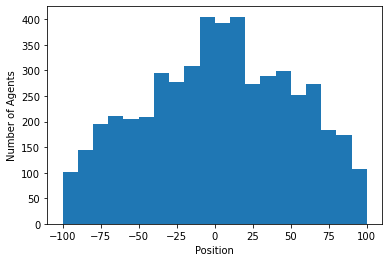

t= 193.30729707915617


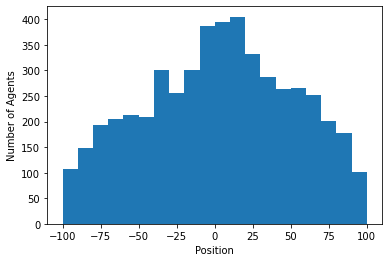

t= 198.8627255341413


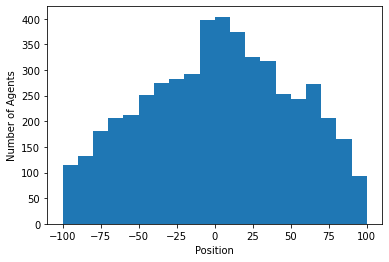

t= 204.5844486036455


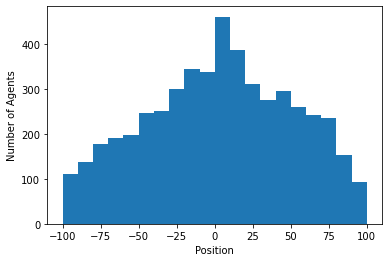

t= 210.1095927551332


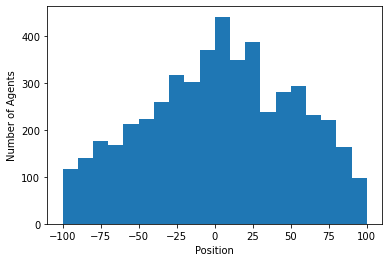

t= 215.64913241317942


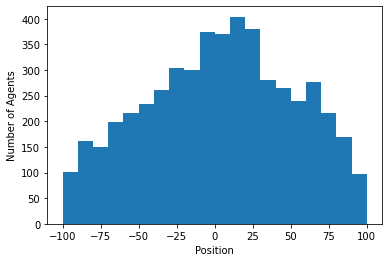

t= 221.27843191703104


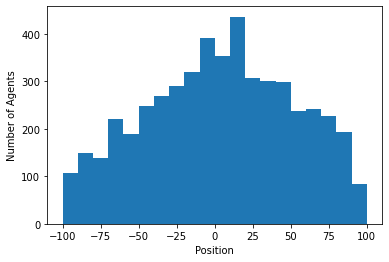

t= 226.88705284232086


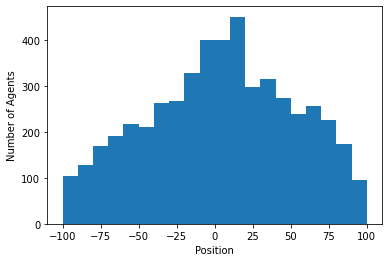

t= 232.55333368269575


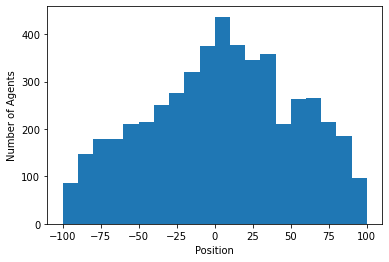

t= 238.04761843939895


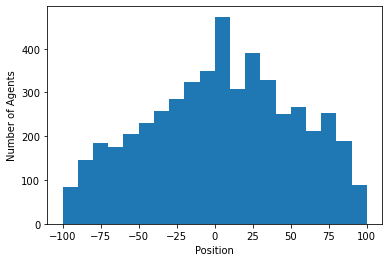

t= 243.53703724743445


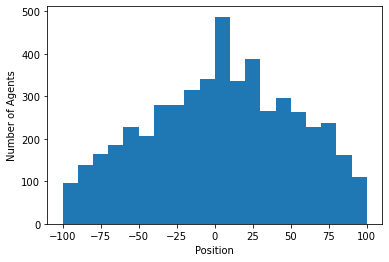

t= 248.9519845755014


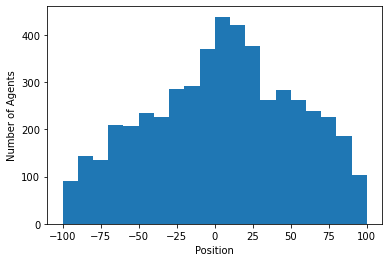

t= 254.70959869457818


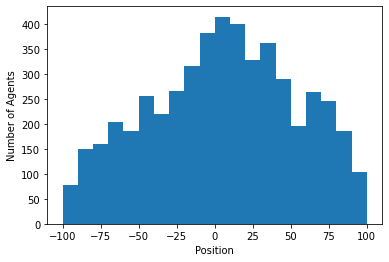

t= 260.42325795482157


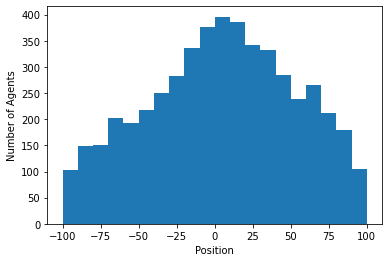

t= 266.04660662114


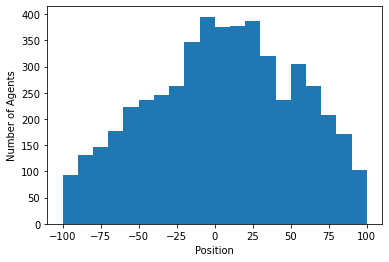

t= 271.5283272618256


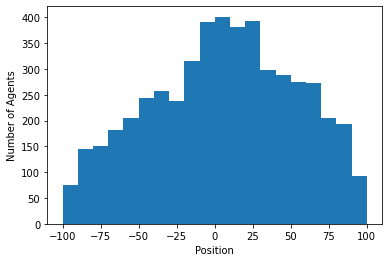

t= 277.11411638035014


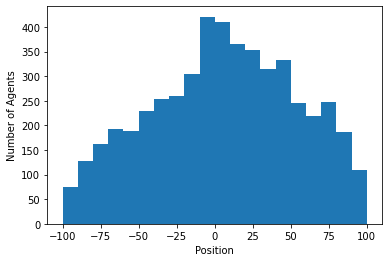

t= 282.8359425844508


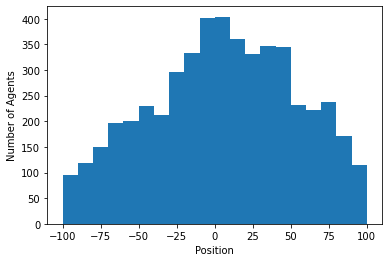

t= 288.55536037281877


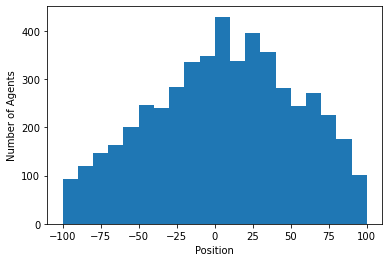

t= 294.0808657689004


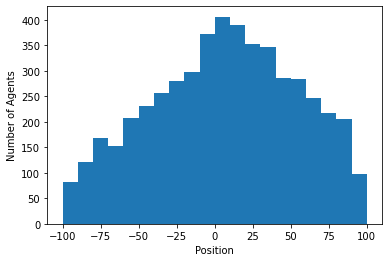

t= 299.63519446195727


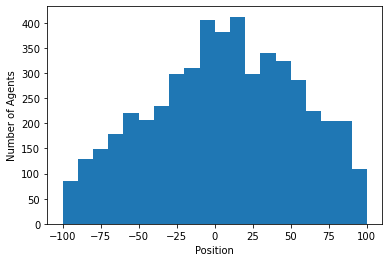

Text(0, 0.5, 'Number of Agents')

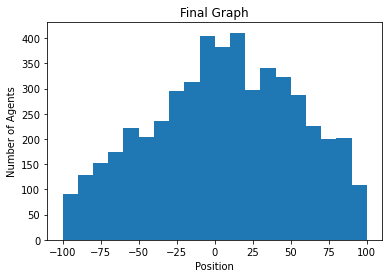

In [8]:
N=5000 #Number of Agents
endtime=300 #Time to end simulation
velocity=[0]*N #Creating list of Velocities for each agent
position=[0]*N #Creating list of positions for each agent
changing=[0]*N #Time until the agent changes direction
T=0 #Length of Simulation
t=[] #This will track the time for each step
count=0 #This is the number of loops in the code
avgposition=[] #This will track the average position for each step
MaxVelocity=1 #This is the largest Magnitude of velocity any agent can have
L=5 #Length of subintervals
Domain=100 #The region will be [-100,100]
lam_0=5 #Scaling in Gamma Distribution
mu=4.5 #Bias of Gamma Distribution towards higher concentration
k=10 #Shape in Gamma Distribution
avgdistance=k/lam_0; #Average distance traveled before changing directions
for i in range(N):#This loop gives each agent their initial velocity and position
    rnd1=random.random()
    if rnd1<.5: #This will give each agent a random velocity with magnitude <= MaxVelocity
        velocity[i]=(2*MaxVelocity)*rnd1
    else:
        velocity[i]=(2*MaxVelocity)*rnd1-2*MaxVelocity
    rnd2=random.random()
    if rnd2<.5: #This will give each agent a random velocity with magnitude <= MaxVelocity
        position[i]=(2*Domain)*rnd2
    else:
        position[i]=(2*Domain)*rnd2-2*Domain
    
for j in range(N): #This loops will calculate the time in which each agent moves with their current velocity
    right=[]
    left=[]
    xr=position[j]
    yr=position[j]+avgdistance
    xl=position[j]-avgdistance
    yl=position[j]
    if Domain-position[j]<avgdistance: #Accounts for avgdistance exceeding boundaries to right
        yrshift=-Domain+(avgdistance-Domain+position[j])
        right=list(filter(lambda inp: inp>xr and inp < yr, position))
        left=list(filter(lambda inp: inp>xl and inp < yl, position))
        right=np.append(right,filter(lambda inp: inp>-Domain and inp < yrshift, position))
    elif abs(-Domain-position[j])<avgdistance:#Accounts for avgdistance exceeding boundaries to left
        xlshift=Domain-(avgdistance-Domain-position[j])
        right=list(filter(lambda inp: inp>xr and inp < yr, position))
        left=list(filter(lambda inp: inp>xl and inp < yl, position))
        left=np.append(left,list(filter(lambda inp: inp>xlshift and inp < Domain, position)))
    else: 
        right=list(filter(lambda inp: inp>xr and inp < yr, position))
        left=list(filter(lambda inp: inp>xl and inp < yl, position))
    if velocity[j]>0:
        S=(len(right)-len(left))/avgdistance
    else:
        S=(len(left)-len(right))/avgdistance
    lam=lam_0-2*mu/np.pi*np.arctan(S*velocity[j])
    changing[j]=np.random.gamma(k,1/lam)
plt.hist(position, bins=20,range=[-Domain, Domain])
plt.title('Initial Distribution')
plt.xlabel('Position')
plt.ylabel('Number of Agents')
plt.show()
while T <endtime: 
    dT=min(changing)
    T=T+dT
    t=np.append(t,T)
    changing=np.array(changing)
    position=np.array(position)
    velocity=np.array(velocity)
    changing=changing-dT
    position=position+velocity*dT
    for q in range(N):
        if abs(position[q])>Domain:
            if position[q]<0:
                position[q]=position[q] % Domain
            if position[q]>0:
                position[q]=-(-position[q]%Domain)
    for p in range(N):
        if changing[p] <=0:
            velocity[p]=(-1)*np.sign(velocity[p])*random.random()
            right=[]
            left=[]
            xr=position[p]
            yr=position[p]+avgdistance
            xl=position[p]-avgdistance
            yl=position[p]
            if Domain-position[p]<avgdistance: #Accounts for avgdistance exceeding boundaries to right
                yrshift=-Domain+(avgdistance-Domain+position[p])
                right=list(filter(lambda inp: inp>xr and inp < yr, position))
                left=list(filter(lambda inp: inp>xl and inp < yl, position))
                right=np.append(right,filter(lambda inp: inp>-Domain and inp < yrshift, position))
            elif abs(-Domain-position[p])<avgdistance:#Accounts for avgdistance exceeding boundaries to left
                xlshift=Domain-(avgdistance-Domain-position[p])
                right=list(filter(lambda inp: inp>xr and inp < yr, position))
                left=list(filter(lambda inp: inp>xl and inp < yl, position))
                left=np.append(left,list(filter(lambda inp: inp>xlshift and inp < Domain, position)))
            else: 
                right=list(filter(lambda inp: inp>xr and inp < yr, position))
                left=list(filter(lambda inp: inp>xl and inp < yl, position))
            if velocity[p]>0:
                S=(len(right)-len(left))/avgdistance
            else:
                S=(len(left)-len(right))/avgdistance
            lam=lam_0-2*mu/np.pi*np.arctan(S*velocity[p])
            changing[p]=np.random.gamma(k,1/lam)
    if len(t)%8000==0:
        print('t=', t[-1])
        plt.hist(position, bins=20,range=[-Domain, Domain])
        plt.xlabel('Position')
        plt.ylabel('Number of Agents')
        plt.show()
plt.hist(position, bins=20,range=[-Domain, Domain])
plt.title('Final Graph')
plt.xlabel('Position')
plt.ylabel('Number of Agents')


# One Peak Initial

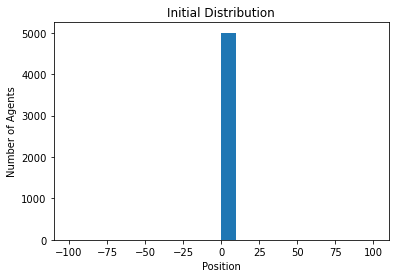

t= 7.910513575102252


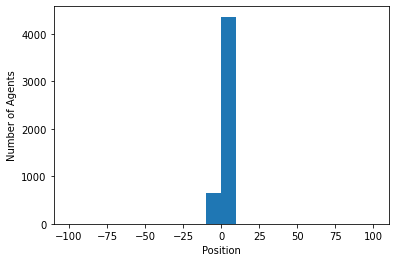

t= 25.507468109808904


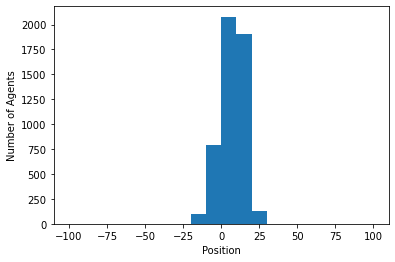

t= 34.72023920853992


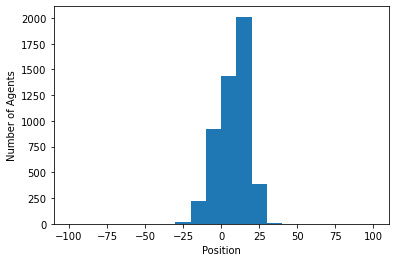

t= 44.82604660474236


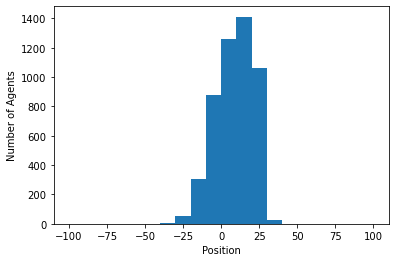

t= 55.22090059214339


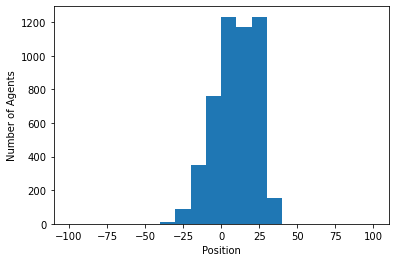

t= 65.73982609513328


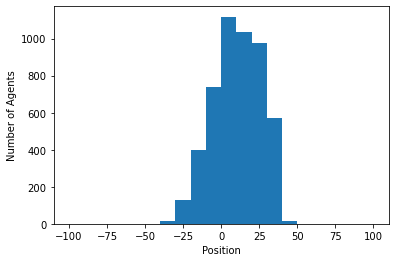

t= 76.08283948101483


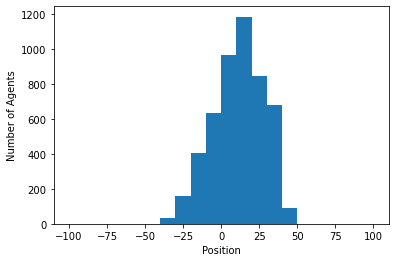

t= 86.74668449095542


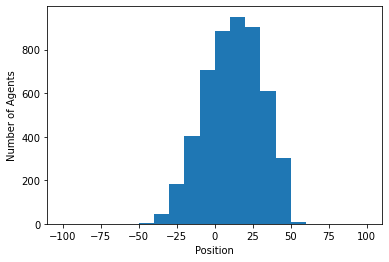

t= 96.62267298885085


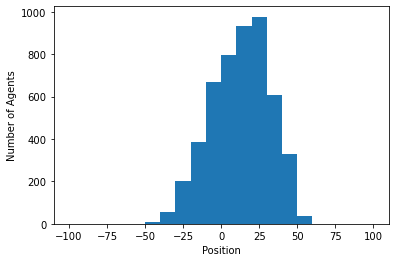

t= 106.3935817422671


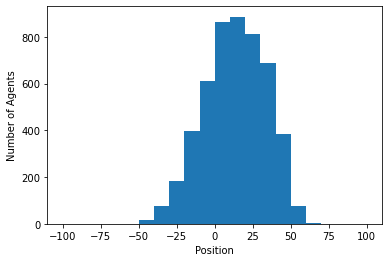

t= 116.31526278269601


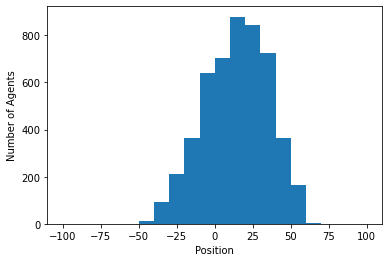

t= 126.07020457555205


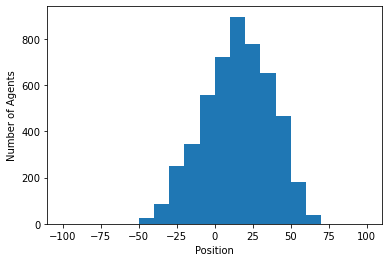

t= 135.6803687118286


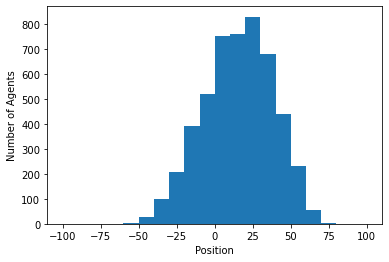

t= 145.8569516655776


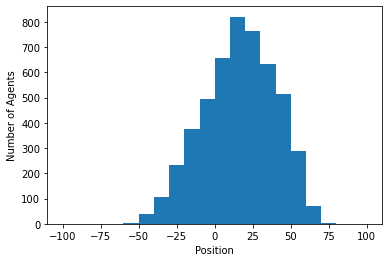

t= 155.22319180402067


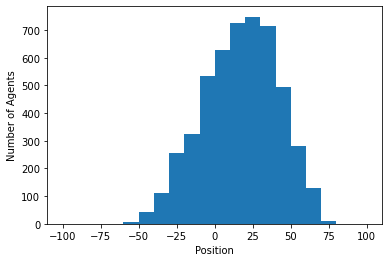

t= 164.75298801364377


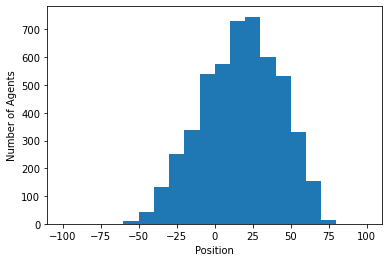

t= 174.29896466780474


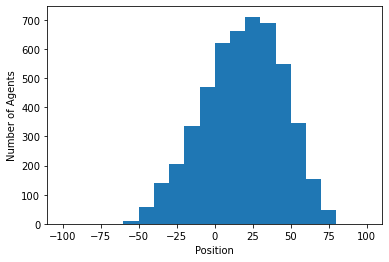

t= 183.53955243392082


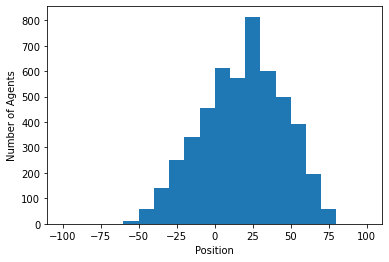

t= 192.29852155324423


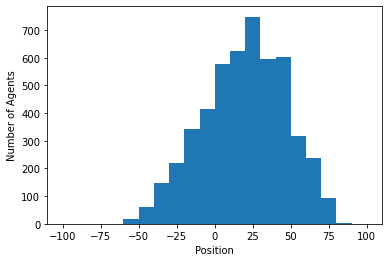

Text(0, 0.5, 'Number of Agents')

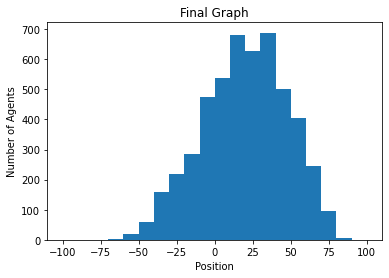

In [9]:
N=5000 #Number of Agents
endtime=200 #Time to end simulation
velocity=[0]*N #Creating list of Velocities for each agent
position=[0]*N #Creating list of positions for each agent, this is initial position as well 
changing=[0]*N #Time until the agent changes direction
T=0 #Length of Simulation
t=[] #This will track the time for each step
count=0 #This is the number of loops in the code
avgposition=[] #This will track the average position for each step
MaxVelocity=1 #This is the largest Magnitude of velocity any agent can have
L=5 #Length of subintervals
Domain=100 #The region will be [-100,100]
lam_0=5 #Scaling in Gamma Distribution
mu=4.5 #Bias of Gamma Distribution towards higher concentration
k=10 #Shape in Gamma Distribution
avgdistance=k/lam_0; #Average distance traveled before changing directions
for i in range(N):#This loop gives each agent their initial velocity
    rnd1=random.random()
    if rnd1<.5: #This will give each agent a random velocity with magnitude <= MaxVelocity
        velocity[i]=(2*MaxVelocity)*rnd1
    else:
        velocity[i]=(2*MaxVelocity)*rnd1-2*MaxVelocity

for j in range(N): #This loops will calculate the time in which each agent moves with their current velocity
    right=[]
    left=[]
    xr=position[j]
    yr=position[j]+avgdistance
    xl=position[j]-avgdistance
    yl=position[j]
    if Domain-position[j]<avgdistance: #Accounts for avgdistance exceeding boundaries to right
        yrshift=-Domain+(avgdistance-Domain+position[j])
        right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
        left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
        right=np.append(right,filter(lambda inp: inp>-Domain and inp < yrshift, position))
    elif abs(-Domain-position[j])<avgdistance:#Accounts for avgdistance exceeding boundaries to left
        xlshift=Domain-(avgdistance-Domain-position[j])
        right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
        left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
        left=np.append(left,list(filter(lambda inp: inp>xlshift and inp < Domain, position)))
    else: 
        right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
        left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
    if velocity[j]>0:
        S=(len(right)-len(left))/avgdistance
    else:
        S=(len(left)-len(right))/avgdistance
    lam=lam_0-2*mu/np.pi*np.arctan(S*velocity[j])
    changing[j]=np.random.gamma(k,1/lam)
plt.hist(position, bins=20,range=[-Domain, Domain])
plt.title('Initial Distribution')
plt.xlabel('Position')
plt.ylabel('Number of Agents')
plt.show()
while T <endtime: 
    dT=min(changing)
    T=T+dT
    t=np.append(t,T)
    changing=np.array(changing)
    position=np.array(position)
    velocity=np.array(velocity)
    changing=changing-dT
    position=position+velocity*dT
    for q in range(N):
        if abs(position[q])>Domain:
            if position[q]<0:
                position[q]=position[q] % Domain
            if position[q]>0:
                position[q]=-(-position[q]%Domain)
    for p in range(N):
        if changing[p] <=0:
            velocity[p]=(-1)*np.sign(velocity[p])*random.random()
            right=[]
            left=[]
            xr=position[p]
            yr=position[p]+avgdistance
            xl=position[p]-avgdistance
            yl=position[p]
            if Domain-position[p]<avgdistance: #Accounts for avgdistance exceeding boundaries to right
                yrshift=-Domain+(avgdistance-Domain+position[p])
                right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
                left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
                right=np.append(right,filter(lambda inp: inp>-Domain and inp < yrshift, position))
            elif abs(-Domain-position[p])<avgdistance:#Accounts for avgdistance exceeding boundaries to left
                xlshift=Domain-(avgdistance-Domain-position[p])
                right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
                left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
                left=np.append(left,list(filter(lambda inp: inp>xlshift and inp < Domain, position)))
            else: 
                right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
                left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
            if velocity[p]>0:
                S=(len(right)-len(left))/avgdistance
            else:
                S=(len(left)-len(right))/avgdistance
            lam=lam_0-2*mu/np.pi*np.arctan(S*velocity[p])
            changing[p]=np.random.gamma(k,1/lam)
    if len(t)%12000==0:
        print('t=', t[-1])
        plt.hist(position, bins=20,range=[-Domain, Domain])
        plt.xlabel('Position')
        plt.ylabel('Number of Agents')
        plt.show()
plt.hist(position, bins=20,range=[-Domain, Domain])
plt.title('Final Graph')
plt.xlabel('Position')
plt.ylabel('Number of Agents')


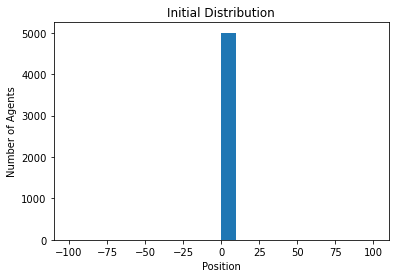

t= 17.73232346822405


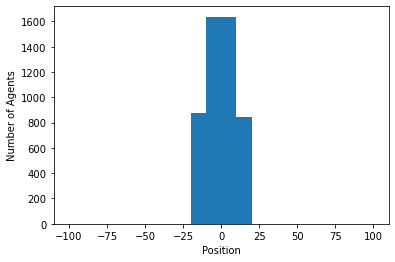

t= 23.554552040361955


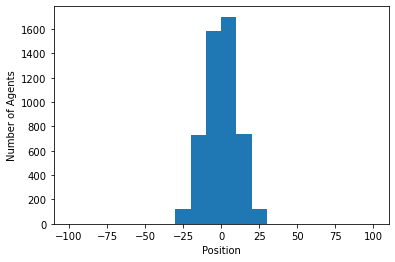

t= 30.2470081507343


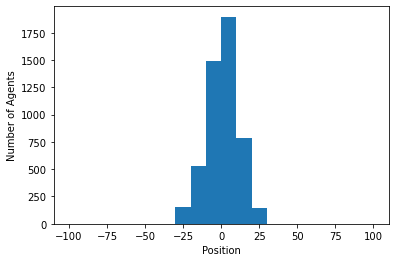

t= 40.13795532869405


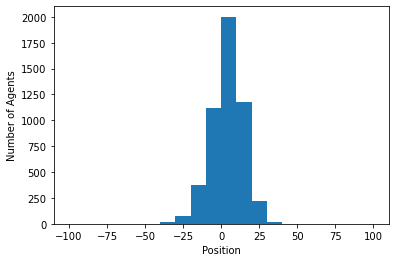

t= 54.439178920929955


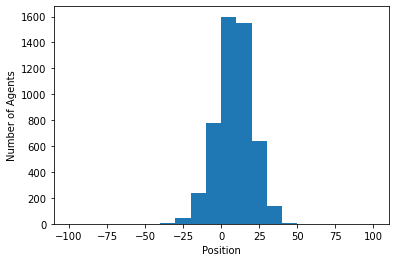

t= 78.03554975286782


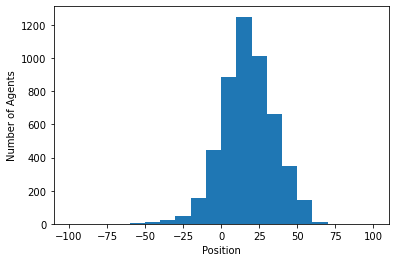

t= 121.52440500824687


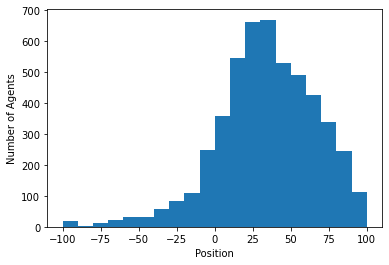

t= 156.6765827545552


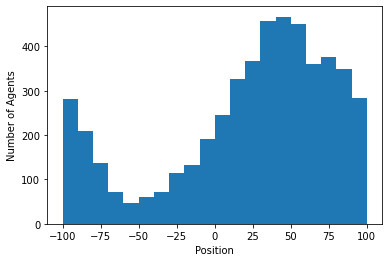

t= 179.7323795745902


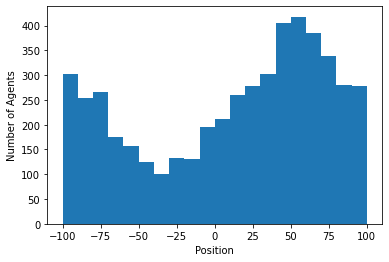

t= 198.25042792554925


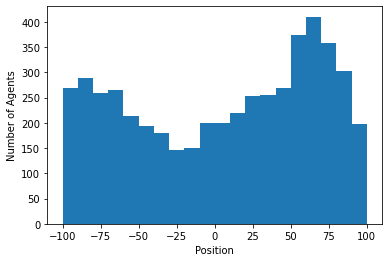

t= 215.24069431389864


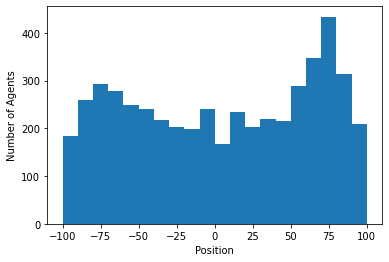

t= 231.09869583261855


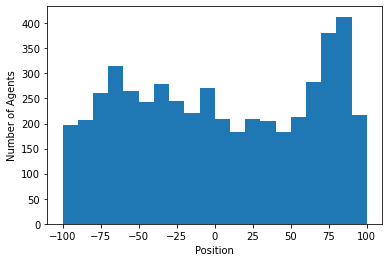

t= 245.22516855135078


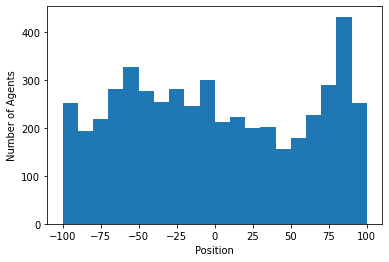

t= 258.4339914252588


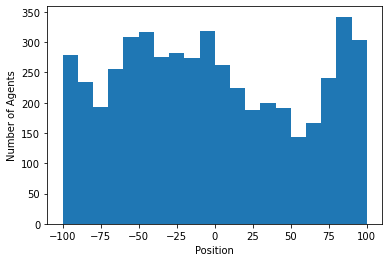

t= 270.1596323268294


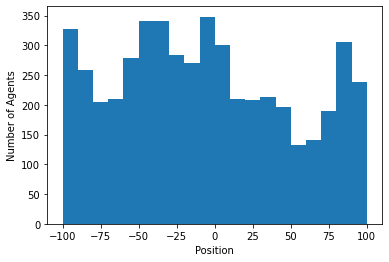

t= 281.31193778106245


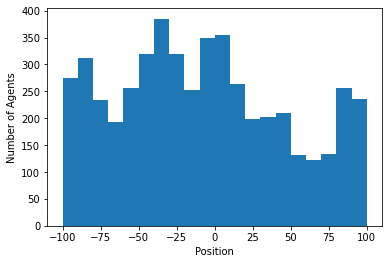

t= 292.8698062613932


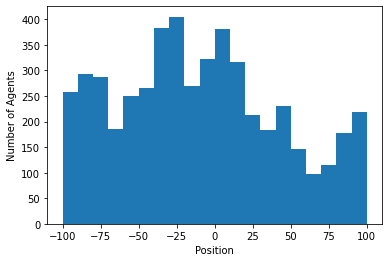

t= 304.50430338672123


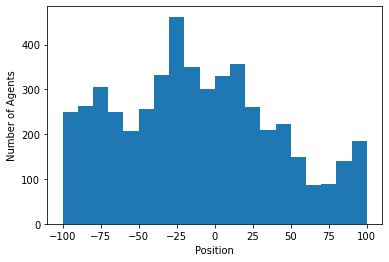

t= 316.16664359086764


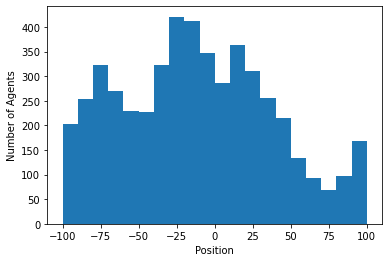

t= 327.84375815554245


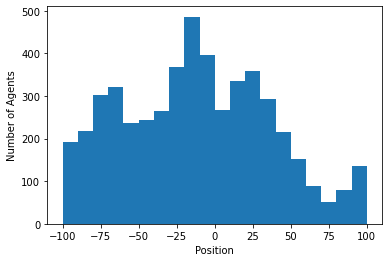

t= 339.6991791158928


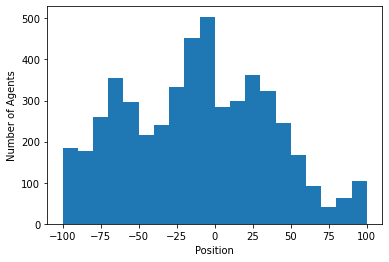

t= 351.27156318692477


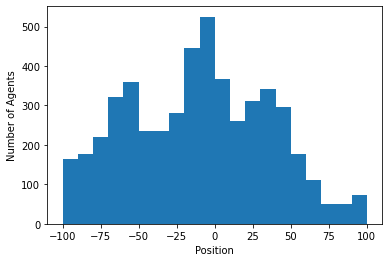

t= 363.04146192358587


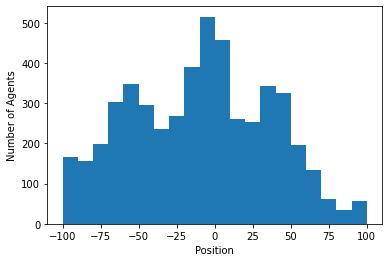

t= 374.7997179836386


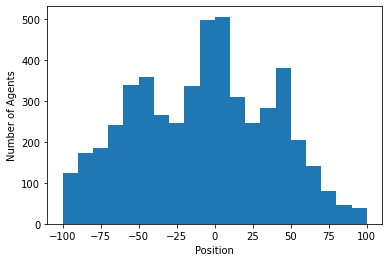

t= 387.3044993298154


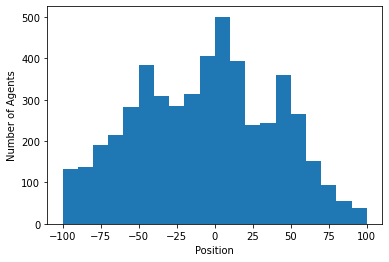

t= 400.47199898676143


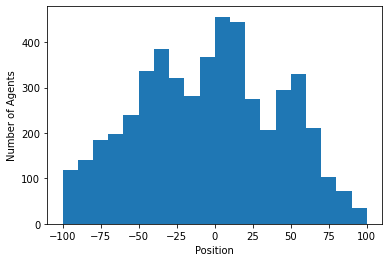

t= 414.61642834866234


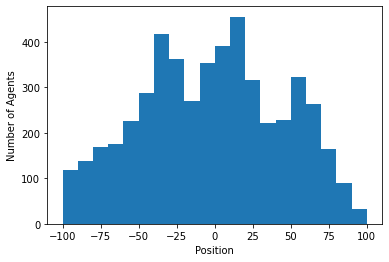

t= 429.6507128372486


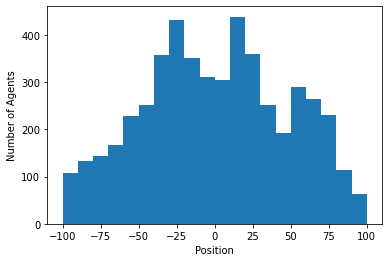

t= 444.73694760255347


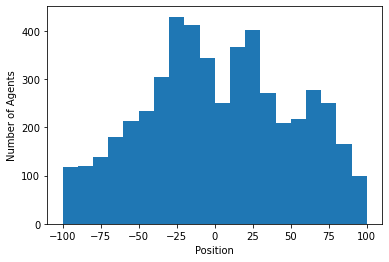

t= 459.7274893984056


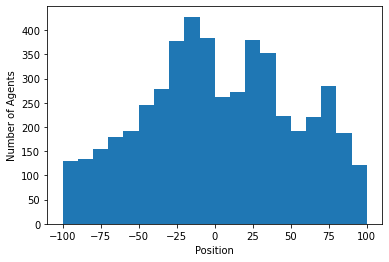

t= 474.23838925805535


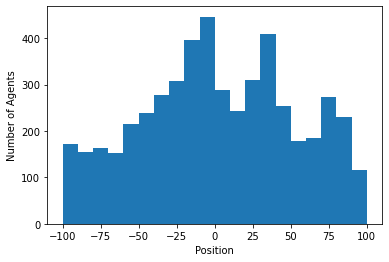

t= 489.08953939871213


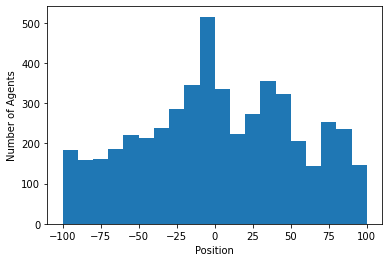

t= 503.2101932774988


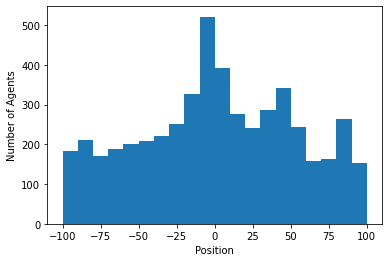

t= 517.3522710997844


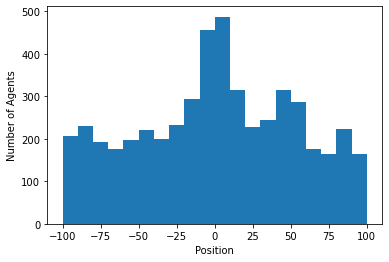

t= 531.2759710973917


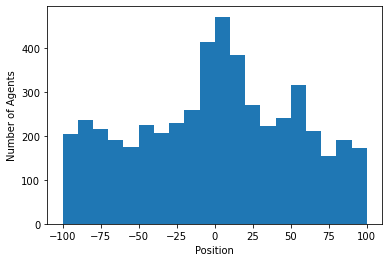

t= 544.2984288122534


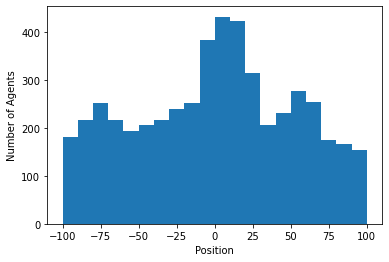

t= 556.8927188863233


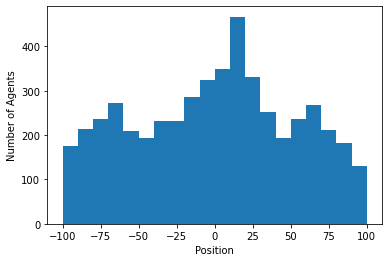

t= 568.9679756992051


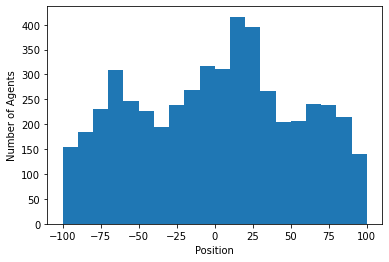

t= 581.7205652143498


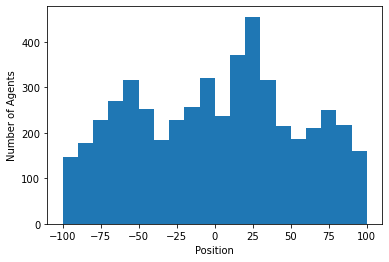

t= 594.7161709153402


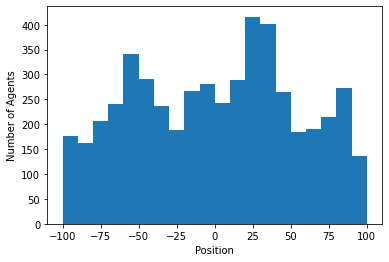

t= 608.172873933134


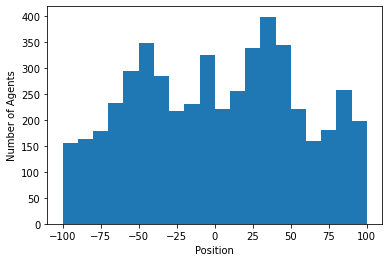

t= 621.4055807565516


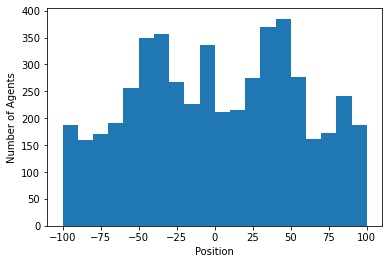

t= 634.6760097984805


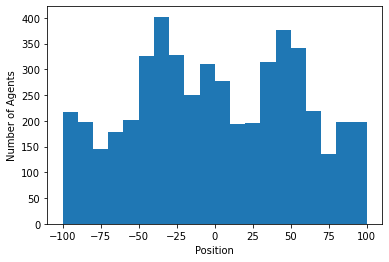

t= 647.090038413485


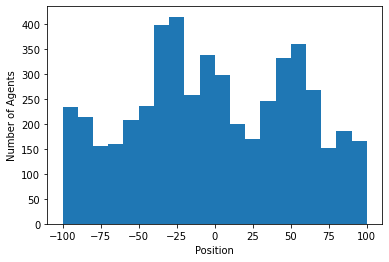

t= 658.7690628226399


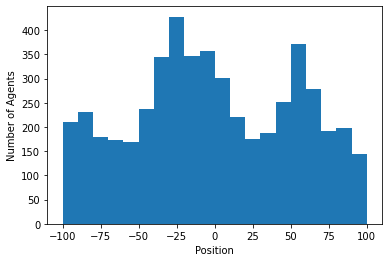

t= 670.3176689730318


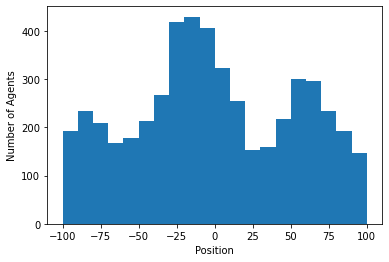

t= 681.9363917930814


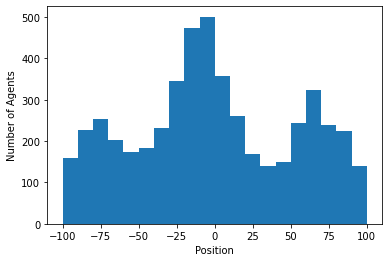

t= 693.8468651124274


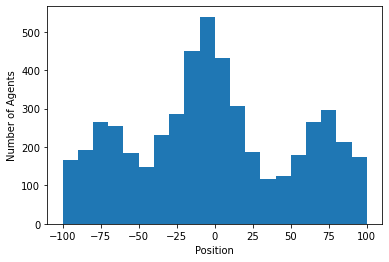

t= 706.1659083770968


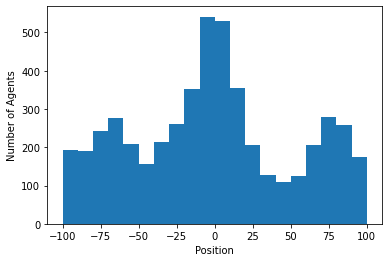

t= 719.6993968029826


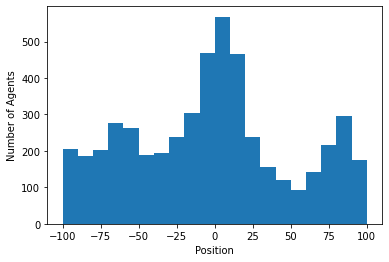

t= 733.130623836968


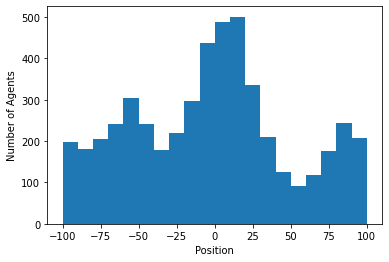

t= 747.4016013306529


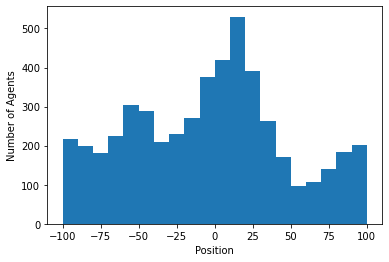

t= 762.3820044454097


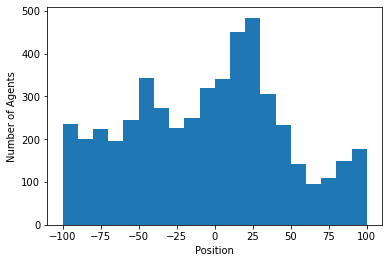

t= 778.2908369357599


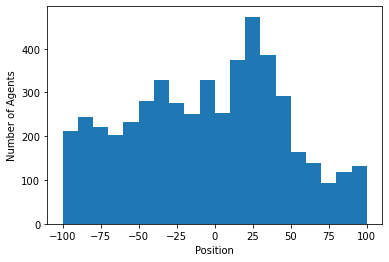

t= 793.4364868796035


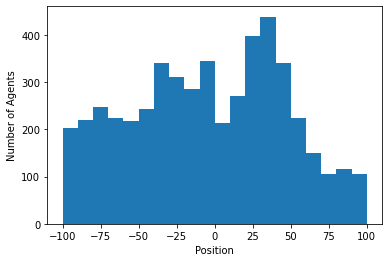

t= 807.8077559788336


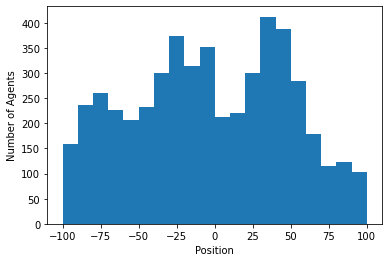

t= 821.3906272847643


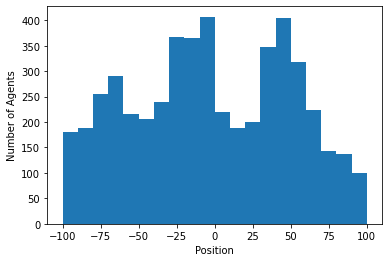

t= 834.369873886359


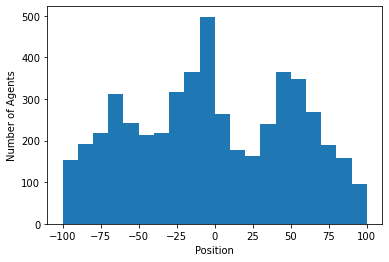

t= 847.7007325636479


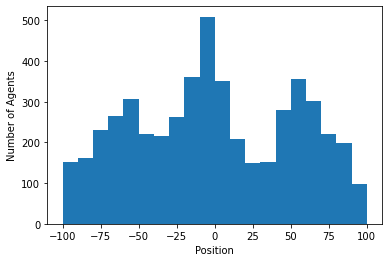

t= 861.2595222551824


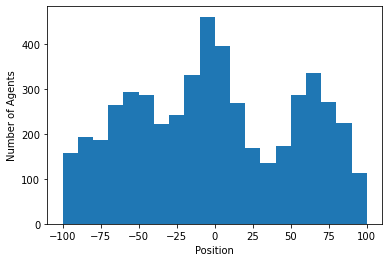

t= 874.7958982263001


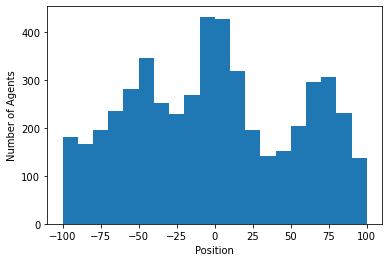

t= 888.375584424062


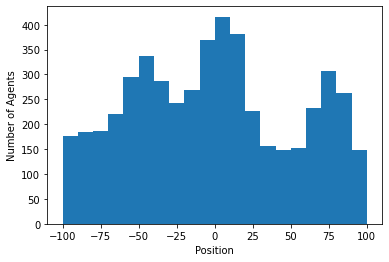

t= 902.6703419643358


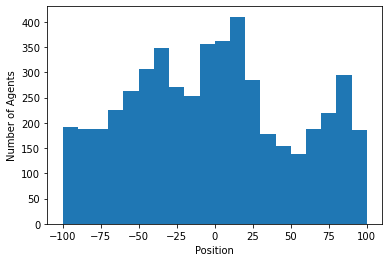

t= 917.4257443392589


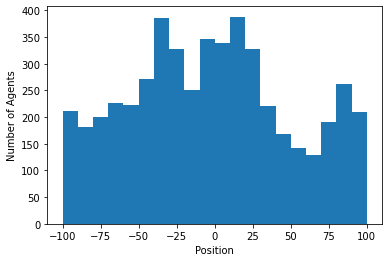

t= 931.91384796465


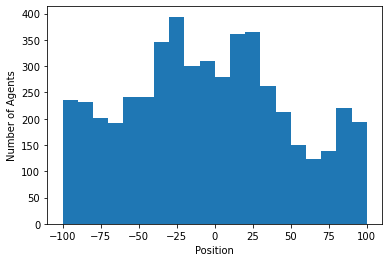

t= 946.0984967772672


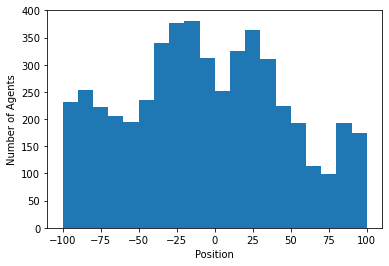

t= 959.4013896020059


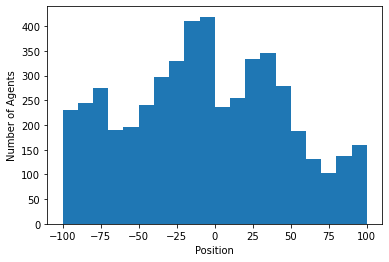

t= 972.4676897859059


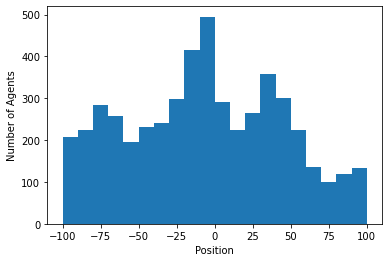

t= 985.3111046833028


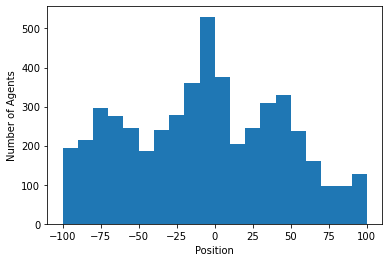

t= 998.0376300522349


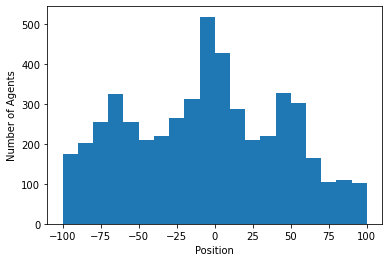

t= 1010.8798256987508


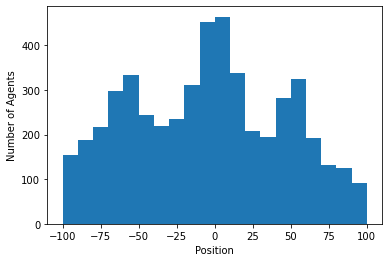

t= 1023.8431485523474


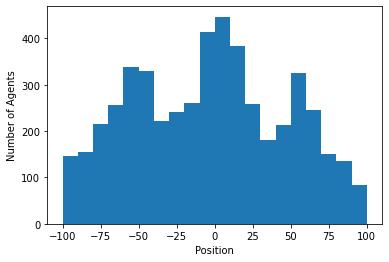

t= 1036.8510063091853


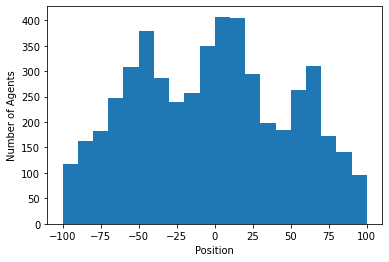

t= 1050.4625494748893


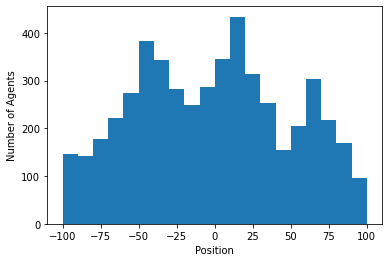

t= 1064.5365260585506


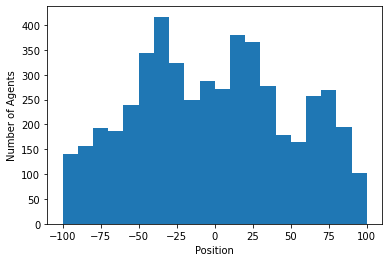

t= 1079.1597761216567


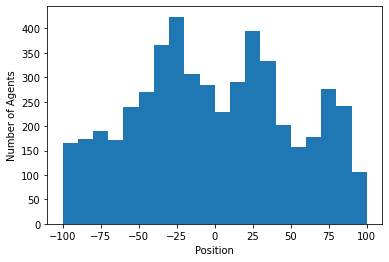

t= 1093.5366710225685


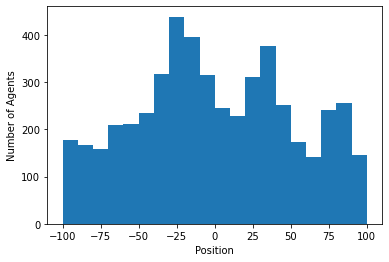

t= 1108.3806584664662


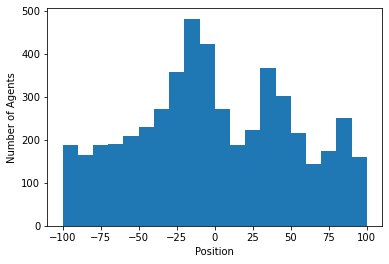

t= 1122.939677056587


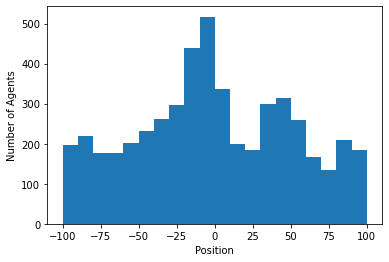

t= 1137.1701823190072


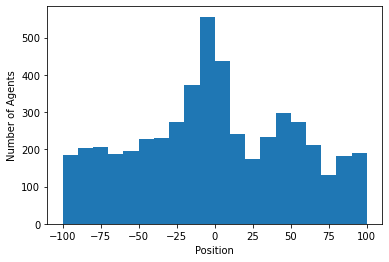

t= 1150.7465074638628


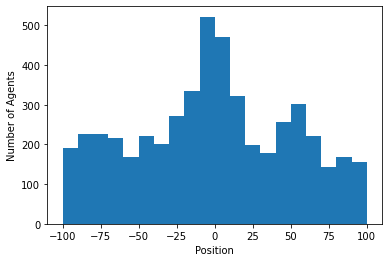

t= 1164.242431746814


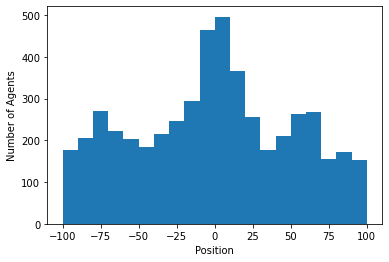

t= 1177.0482708413767


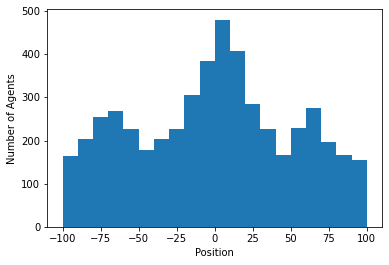

t= 1190.3805786113749


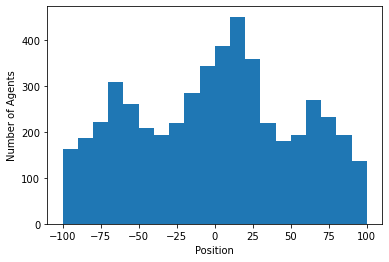

t= 1203.5660051674479


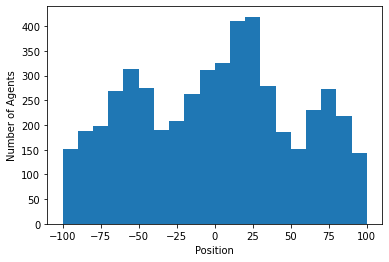

t= 1217.9474234936015


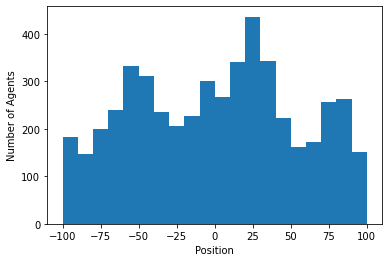

t= 1232.3692932701126


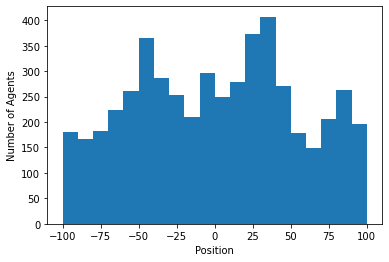

t= 1247.301030877813


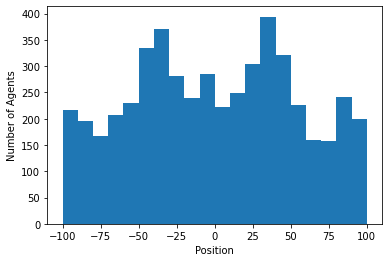

t= 1261.6539394080576


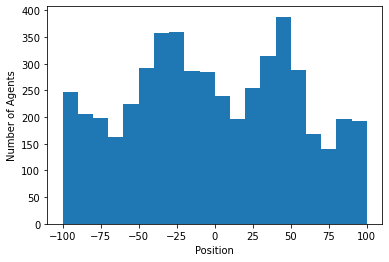

t= 1274.8850090451197


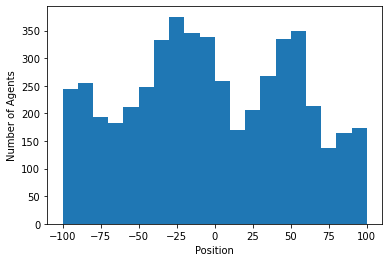

t= 1287.1094257663765


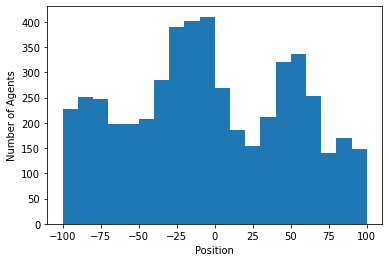

t= 1298.75331182581


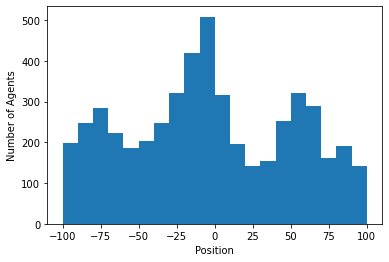

t= 1310.8366922247717


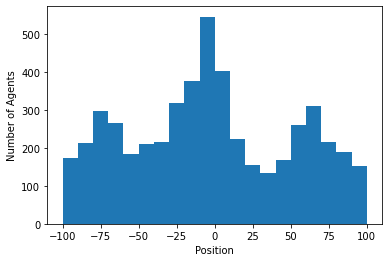

t= 1323.798808690806


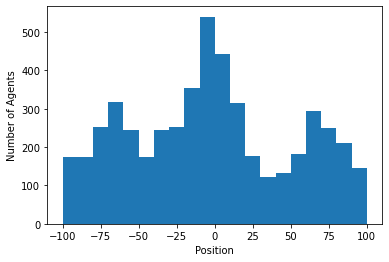

t= 1336.7035401966064


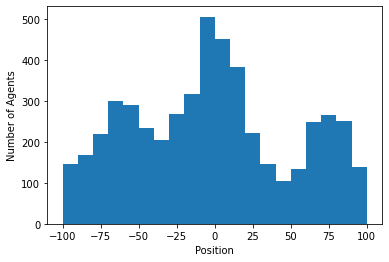

t= 1350.5574274171777


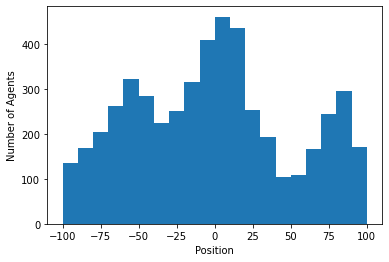

t= 1364.8572009734696


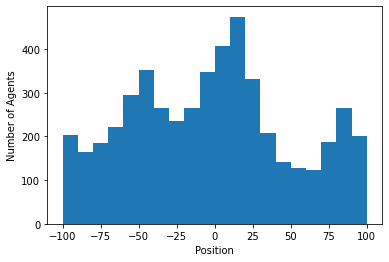

t= 1379.5152338974026


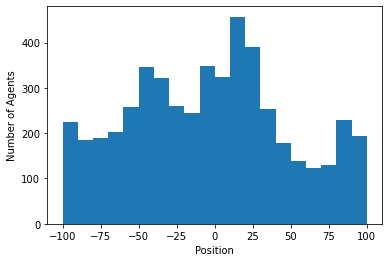

t= 1394.8869628349123


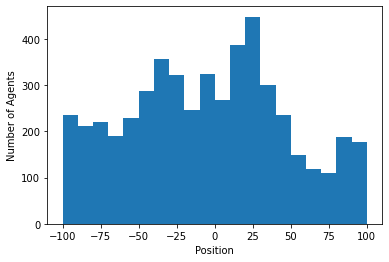

t= 1409.9238244631474


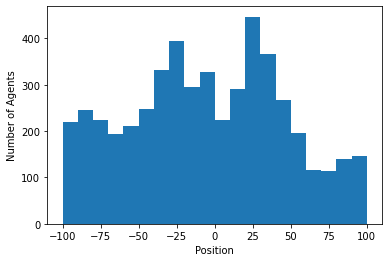

t= 1424.5449072397678


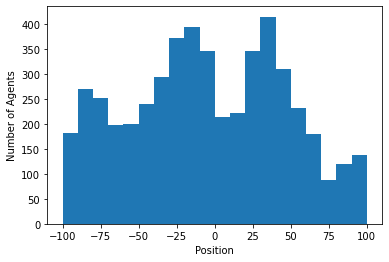

t= 1437.9971174843674


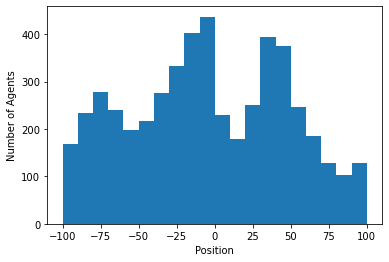

t= 1450.7366872659475


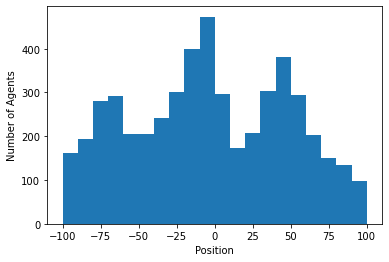

t= 1463.8369125384854


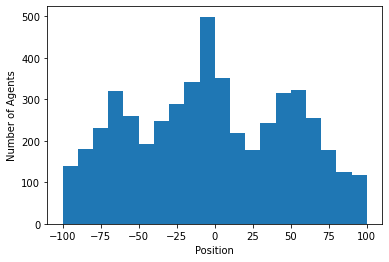

t= 1476.8979716724255


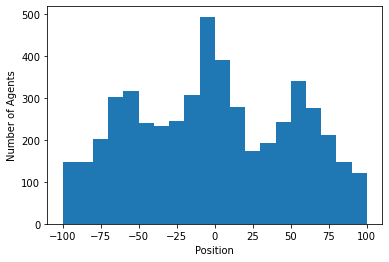

t= 1490.4440876715094


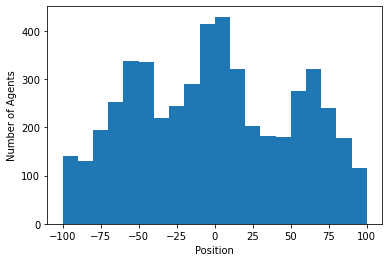

Text(0, 0.5, 'Number of Agents')

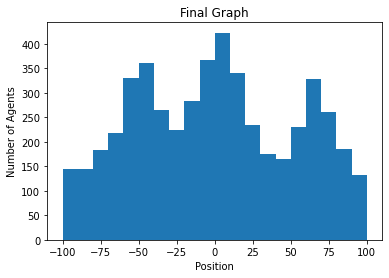

In [23]:
N=5000 #Number of Agents
endtime=1500 #Time to end simulation
velocity=[0]*N #Creating list of Velocities for each agent
position=[0]*N #Creating list of positions for each agent, this is initial position as well 
changing=[0]*N #Time until the agent changes direction
T=0 #Length of Simulation
t=[] #This will track the time for each step
count=0 #This is the number of loops in the code
avgposition=[] #This will track the average position for each step
MaxVelocity=1 #This is the largest Magnitude of velocity any agent can have
L=5 #Length of subintervals
Domain=100 #The region will be [-100,100]
lam_0=.5 #Scaling in Gamma Distribution
mu=.45 #Bias of Gamma Distribution towards higher concentration
k=10 #Shape in Gamma Distribution
avgdistance=k/lam_0; #Average distance traveled before changing directions
for i in range(N):#This loop gives each agent their initial velocity
    rnd1=random.random()
    if rnd1<.5: #This will give each agent a random velocity with magnitude <= MaxVelocity
        velocity[i]=(2*MaxVelocity)*rnd1
    else:
        velocity[i]=(2*MaxVelocity)*rnd1-2*MaxVelocity

for j in range(N): #This loops will calculate the time in which each agent moves with their current velocity
    right=[]
    left=[]
    xr=position[j]
    yr=position[j]+avgdistance
    xl=position[j]-avgdistance
    yl=position[j]
    if Domain-position[j]<avgdistance: #Accounts for avgdistance exceeding boundaries to right
        yrshift=-Domain+(avgdistance-Domain+position[j])
        right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
        left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
        right=np.append(right,filter(lambda inp: inp>-Domain and inp < yrshift, position))
    elif abs(-Domain-position[j])<avgdistance:#Accounts for avgdistance exceeding boundaries to left
        xlshift=Domain-(avgdistance-Domain-position[j])
        right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
        left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
        left=np.append(left,list(filter(lambda inp: inp>xlshift and inp < Domain, position)))
    else: 
        right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
        left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
    if velocity[j]>0:
        S=(len(right)-len(left))/avgdistance
    else:
        S=(len(left)-len(right))/avgdistance
    lam=lam_0-2*mu/np.pi*np.arctan(S*velocity[j])
    changing[j]=np.random.gamma(k,1/lam)
plt.hist(position, bins=20,range=[-Domain, Domain])
plt.title('Initial Distribution')
plt.xlabel('Position')
plt.ylabel('Number of Agents')
plt.show()
while T <endtime: 
    dT=min(changing)
    T=T+dT
    t=np.append(t,T)
    changing=np.array(changing)
    position=np.array(position)
    velocity=np.array(velocity)
    changing=changing-dT
    position=position+velocity*dT
    for q in range(N):
        if abs(position[q])>Domain:
            if position[q]<0:
                position[q]=position[q] % Domain
            if position[q]>0:
                position[q]=-(-position[q]%Domain)
    for p in range(N):
        if changing[p] <=0:
            velocity[p]=(-1)*np.sign(velocity[p])*random.random()
            right=[]
            left=[]
            xr=position[p]
            yr=position[p]+avgdistance
            xl=position[p]-avgdistance
            yl=position[p]
            if Domain-position[p]<avgdistance: #Accounts for avgdistance exceeding boundaries to right
                yrshift=-Domain+(avgdistance-Domain+position[p])
                right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
                left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
                right=np.append(right,filter(lambda inp: inp>-Domain and inp < yrshift, position))
            elif abs(-Domain-position[p])<avgdistance:#Accounts for avgdistance exceeding boundaries to left
                xlshift=Domain-(avgdistance-Domain-position[p])
                right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
                left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
                left=np.append(left,list(filter(lambda inp: inp>xlshift and inp < Domain, position)))
            else: 
                right=list(filter(lambda inp: inp>=xr and inp <= yr, position))
                left=list(filter(lambda inp: inp>=xl and inp <= yl, position))
            if velocity[p]>0:
                S=(len(right)-len(left))/avgdistance
            else:
                S=(len(left)-len(right))/avgdistance
            lam=lam_0-2*mu/np.pi*np.arctan(S*velocity[p])
            changing[p]=np.random.gamma(k,1/lam)
    if len(t)%2000==0:
        print('t=', t[-1])
        plt.hist(position, bins=20,range=[-Domain, Domain])
        plt.xlabel('Position')
        plt.ylabel('Number of Agents')
        plt.show()
plt.hist(position, bins=20,range=[-Domain, Domain])
plt.title('Final Graph')
plt.xlabel('Position')
plt.ylabel('Number of Agents')
